In [ ]:
from PyParticle.population import build_population
pop_cfg_50nm = {
    "type": "binned_lognormals",
    "N": [1e7],
    "N_units": "m-3",
    "GMD": [50e-9],
    "GMD_units": "m",
    "GSD": [1.6],
    "aero_spec_names": [["SO4"]],
    "aero_spec_fracs": [[1.0]],
    "N_bins": 1000,
    "D_min": 10e-9,
    "D_max": 2e-6,
    "refractive_index": [1.75, 0.44]
  }

pop_cfg_250nm = {
    "type": "binned_lognormals",
    "N": [1e9],
    "N_units": "m-3",
    "GMD": [50e-9],
    "GMD_units": "m",
    "GSD": [1.6],
    "aero_spec_names": [["SO4"]],
    "aero_spec_fracs": [[1.0]],
    "N_bins": 1000,
    "D_min": 10e-9,
    "D_max": 2e-6,
    "refractive_index": [1.75, 0.44]
  }

pop_50nm = build_population(pop_cfg_50nm)
pop_250nm = build_population(pop_cfg_250nm)

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/fier887/miniforge3/envs/pyparticle-partmc/lib/python3.9/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/fier887/miniforge3/envs/pyparticle-partmc/lib/python3.9/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/Users/fier887/miniforge3/envs/pyparticle-partmc/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 301, in dispatch_control
    async with self._control_lock:
  File "/Users/fier887/miniforge3/envs/pyparticle-partmc/lib/python3.9/site-packages/traitlets/traitlets.py", line 687, in __get__
    return t.cast(G, self.get(obj, cls))  # the G should encode the Optional
  File "/Users/fier887/miniforge3/envs/pyparticle-partmc/lib/pytho

Discovered plotter types: ['state_line', 'state_scatter']
Requested plotter type: state_line


/Users/fier887/Library/CloudStorage/OneDrive-PNNL/Code/PyParticle/src/PyParticle/aerosol_particle.py:272: UserWarning: Surface tension not implemented; returning default 0.072 N/m
  warnings.warn("Surface tension not implemented; returning default 0.072 N/m", UserWarning)


[ 0.01        0.01072267  0.01149757  0.01232847  0.01321941  0.01417474
  0.01519911  0.01629751  0.01747528  0.01873817  0.02009233  0.02154435
  0.0231013   0.02477076  0.02656088  0.02848036  0.03053856  0.03274549
  0.03511192  0.03764936  0.04037017  0.04328761  0.04641589  0.04977024
  0.05336699  0.05722368  0.06135907  0.06579332  0.07054802  0.07564633
  0.08111308  0.0869749   0.09326033  0.1         0.10722672  0.1149757
  0.12328467  0.13219411  0.14174742  0.15199111  0.16297508  0.17475284
  0.18738174  0.2009233   0.21544347  0.23101297  0.24770764  0.26560878
  0.28480359  0.30538555  0.32745492  0.35111917  0.37649358  0.40370173
  0.43287613  0.46415888  0.49770236  0.53366992  0.57223677  0.61359073
  0.65793322  0.70548023  0.75646333  0.81113083  0.869749    0.93260335
  1.          1.07226722  1.149757    1.23284674  1.32194115  1.41747416
  1.51991108  1.62975083  1.7475284   1.87381742  2.009233    2.15443469
  2.3101297   2.47707636  2.65608778  2.84803587  3.

AttributeError: Line2D.set() got an unexpected keyword argument 'cmap'

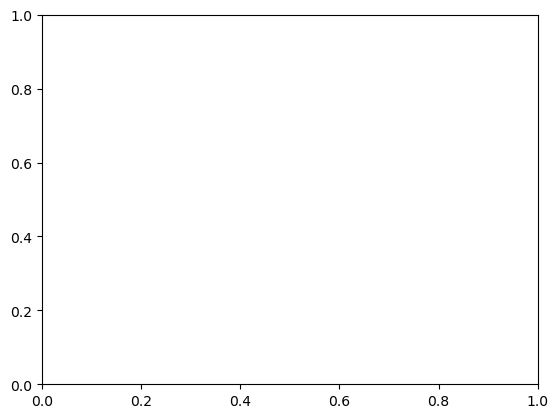

In [ ]:
from PyParticle.viz.style import StyleManager, Theme
from PyParticle.viz.builder import build_plotter
import matplotlib.pyplot as plt
import numpy as np
series = [
    {"key": "50", "population": pop_50nm, "label": "$\mu=50$ nm"},
    {"key": "250", "population": pop_250nm, "label": "$\mu=250$ nm"},
]

mgr = StyleManager(Theme(), deterministic=True)

# Lines
line_styles = mgr.plan("line", [s["key"] for s in series])

fig, ax = plt.subplots()
for s in series:
    cfg = {
        # "varname": "b_scat",
        # # "var_cfg": {"wvl_grid": [550e-9], "rh_grid": np.linspace(0.,100.,21)},  # simple case: single x
        # "var_cfg": {"wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single x
        # "style": line_styles[s["key"]],

        "varname": "Nccn",
        # "var_cfg": {"wvl_grid": [550e-9], "rh_grid": np.linspace(0.,100.,21)},  # simple case: single x
        #"var_cfg": {"wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single x
        "style": line_styles[s["key"]],
    }
    plotter = build_plotter("state_line", cfg)
    plotter.plot(s["population"], ax, label=s["label"])
ax.legend(); fig.tight_layout()

In [ ]:
from .helpers.pymiescatt_comparison import pymiescatt_lognormal_optics

mgr = StyleManager(Theme(), deterministic=True)

# Lines
line_styles = mgr.plan("line", [s["key"] for s in series])

fig, ax = plt.subplots()
for s in series:
    cfg = {
        "varname": "b_scat",
        "var_cfg": {"wvl_grid": np.linspace(350e-9,1050e-9,29), "rh_grid": [0.]},  # simple case: single x
        "style": line_styles[s["key"]],
    }
    plotter = build_plotter("state_line", cfg)
    plotter.plot(s["population"], ax, label=s["label"])

    pymiescatt_lognormal_optics(s["population"].cfg, cfg.get('var_cfg'),linesteyle='--',color=line_styles[s["key"]]['color'])
ax.legend(); fig.tight_layout()